#### 무게를 찾기
- 목표      : 농어 길이 피쳐를 사용해서 무게를 예측하기
- 데이터셋  : fish.csv
- 피쳐/속성 : Length
- 타겟/라벨 : Weight

[1] 데이터 준비 및 피쳐/타겟 분석

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
DATA_FILE=r'C:\Users\kdp\Desktop\KDW\EX_Machine_Learning\data\fish.csv'
fishDF=pd.read_csv(DATA_FILE, usecols=[0,1,2])
PerchDF=fishDF[fishDF['Species']=='Perch']
PerchDF.reset_index(drop=True, inplace=True)
PerchDF=PerchDF.drop('Species', axis=1)
PerchDF.head()

,Weight,Length
0,5.9,8.4
1,32.0,13.7
2,40.0,15.0
3,51.5,16.2
4,70.0,17.4


In [39]:
PerchDF.corr(numeric_only=True)

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


In [40]:
features=PerchDF['Length']
target=PerchDF['Weight']
print(f'features => {features.shape}, {features.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

features => (56,), 1D
target => (56,), 1D


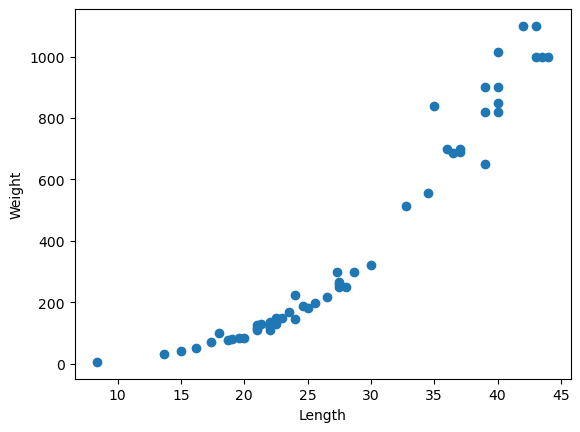

In [41]:
plt.scatter(features,target)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

[2] 학습 준비
- 학습알고리즘: KNN Regressor
- 피쳐 스케일링
- 학습용/테스트용 데이터셋 분리

[2-1] 피쳐와 타겟 분리

In [42]:
featureDF=PerchDF['Length']
targetSR=PerchDF['Weight']

print(f'featureDF : {featureDF.shape}, {featureDF.ndim}D')
print(f'targetSR : {targetSR.shape}, {targetSR.ndim}D')

featureDF : (56,), 1D
targetSR : (56,), 1D


[2-2] 학습용 & 테스트용 데이터셋 분리
* 전체 데이터셋 => 학습용 : 테스트용 = 75:25, 80:20, 70:30
* 회귀 데이터셋 => 데이터셋 구성 요소에 대한 비율 고려 X

In [43]:
from sklearn.model_selection import train_test_split
import numpy as np


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(featureDF, targetSR, random_state=10)

In [45]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
print(f'X_train : {X_train.shape}, {X_train.ndim}D, Y_train : {Y_train.shape}, {Y_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D, Y_test : {Y_test.shape}, {Y_test.ndim}D')

X_train : (42, 1), 2D, Y_train : (42,), 1D
X_test : (14, 1), 2D, Y_test : (14,), 1D


In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
# 스케일러 인스턴스 생성
mmScaler=MinMaxScaler()

In [48]:
# 스케일러에 데이터셋 전용의 속성값 설정
mmScaler.fit(X_train)

MinMaxScaler()

In [50]:
mmScaler.min_, mmScaler.scale_, mmScaler.data_min_, mmScaler.data_max_

(array([-0.23595506]), array([0.02808989]), array([8.4]), array([44.]))

In [52]:
# 학습용, 테스트용 데이터셋 스케일링 진행
mmScaler.fit_transform(X_train)
mmScaler.fit_transform(X_test)

array([[0.5125    ],
       [0.05      ],
       [0.52083333],
       [0.41666667],
       [0.32083333],
       [0.29166667],
       [1.        ],
       [0.        ],
       [0.35416667],
       [0.4       ],
       [0.54166667],
       [0.74166667],
       [0.3125    ],
       [0.57083333]])

[3] 학습진행

In [4]:
x= [[0],[1],[2],[3]]
y=[0,0,1,1]

from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x,y)

KNeighborsRegressor(n_neighbors=2)

In [5]:
print(neigh.predict([[1.5]]))

[0.5]


In [6]:
distance, index = neigh.kneighbors([[1.5]])
index=index.reshape(-1)


In [7]:
for idx in index.tolist():
    print(idx,y[idx])

1 0
2 1


In [8]:
# 학습 모델 인스턴스 생성
model = KNeighborsRegressor()
# 학습용 데이터셋으로 학습 진행
model.fit(x_train_scaled, Y_train)

NameError: name 'x_train_scaled' is not defined

In [10]:
#  모델 파라미터  => 학습후 즉 fit() 실행 후 설정되는 매개 변수 
model.n_features_in_ ,model.n_samples_fit_, model.effective_metric_, model.effective_metric_params_

AttributeError: 'KNeighborsRegressor' object has no attribute 'n_features_in_'

[4] 최적의 k 찾기


In [11]:
for k in range(1,model.n_samples_fit_+1):
    #최근접 이웃의 갯수 설정 <== 모델 성능 좌우  : 하이퍼파라미터

    model.n_neighbors =k

    #성능평가
    score=model.score(X_test_scaled, Y_test)

AttributeError: 'KNeighborsRegressor' object has no attribute 'n_samples_fit_'

In [13]:
sorted(scores.items(), key=lambda x :x[1], rdverse=True)

NameError: name 'scores' is not defined

In [ ]:
# 최고 성능의 k 값
best_k = sorted(scores.items(), key = lambda )

[5] 새로운 데이터의 무게 예측하기

In [14]:
new_length=input('농어길이 :')
print(f'new_length: {new_length}')

new_length: 20


In [15]:
# 20D , 스케일링 적용
dataDF=pd.DataFrame([[]])

NameError: name 'pd' is not defined

In [16]:
# 피처스케일링
DATA_FILE

NameError: name 'DATA_FILE' is not defined

In [17]:
distamce, index

NameError: name 'distamce' is not defined

####  KNN  단점

 => 학습 데이터셋의 범위를 벗어난 더 큰 데이터 ,더 작은 데이터의 경우   
 정확한 예측불가